# Music Database Analysis

## Intro

Analysis of music data set according to their attributes

## Database

Skip that part if you do not want to analyze local playlist.Gives an rough overview of the two lists.

In [1]:
from mulo import CreatePlayList
filename_json_playlist_like = 'Playlist_like.json'
filename_json_playlist_dislike = 'Playlist_dislike.json'
print('\nSongs in the Like Playlist', '\n--------------------------\n')
CreatePlayList('D:\Data\Projects\Database\SONG LIBRARY\LIKE', filename_json_playlist_like, 'w')
print('\nSongs in the Like Playlist', '\n--------------------------\n')
CreatePlayList('D:\Data\Projects\Database\SONG LIBRARY\DISLIKE', filename_json_playlist_dislike, 'w')


Songs in the Like Playlist 
--------------------------

Songindex=0, artist/title= A Boogie Wit Da Hoodie - Bleed
Songindex=1, artist/title= A$AP Rocky - Praise The Lord
Songindex=2, artist/title= Abra Cadabra - Daily Duppy
Songindex=3, artist/title= Abra Cadabra - Double Tap
Songindex=4, artist/title= Benji Ceez - Willy Wonka
Songindex=5, artist/title= Don Toliver - After Party
Songindex=6, artist/title= Don Toliver - No Idea
Songindex=7, artist/title= Don Toliver - No Photos
Songindex=8, artist/title= Fredo - Double Tap
Songindex=9, artist/title= J Hus - Did You See
Songindex=10, artist/title= Jaden - Icon
Songindex=11, artist/title= Joyner Lucas - Lotto
Songindex=12, artist/title= Meek Mill - Pain Away
Songindex=13, artist/title= NLE Choppa - Walk Em Down
Songindex=14, artist/title= NSG - After OT Bop
Songindex=15, artist/title= PlayBoi Carti - @Meh
Songindex=16, artist/title= Polo G - Epidemic
Songindex=17, artist/title= Roddy Rich - Down Below
Songindex=18, artist/title= Travis S

## Load data set

Reproducible dataset.

In [2]:
import json
# Opening JSON file
database_like = dict()
database_dislike = dict()
with open(filename_json_playlist_like) as json_file:
    database_like = json.load(json_file)
with open(filename_json_playlist_dislike) as json_file:
    database_dislike = json.load(json_file)

In [3]:
tracklist_like = []
tracklist_dislike = []

for i in database_like:
    artist, title = database_like[i].split(' - ')
    tracklist_like.append([title, artist])
    
for i in database_dislike:
    artist, title = database_dislike[i].split(' - ')
    tracklist_dislike.append([title, artist])

In [4]:
def CreatePropertyDict(trackinfo, artistinfo, metadata):
    property_list = []
    for i in range(0, len(trackinfo)):
        properties = dict()
        properties['artist'] = trackinfo[i]['artist']
        properties['track'] = trackinfo[i]['track']
        properties['track_id'] = trackinfo[i]['track_id']
        properties['genres'] = artistinfo[i]['genres']
        properties['popularity'] = trackinfo[i]['popularity']
        #print(metadata[i])
        properties = {**properties, **metadata[i]}
        property_list.append(properties)
    return property_list

In [5]:
from rema import remotedatabase as rema
def CreateDatabase(track_list):
    ra = rema()
    database_content = []
    track_uri = []
    artist_uri = []
    for title, artist in track_list:
        sound_trax = ra.GetAttributes(title, artist)
        #multiple selections possible - but only the first one is examined
        sound_trax = [sound_trax[0]] 
        for i in range(0, len(sound_trax)):
            t_artist_uri = sound_trax[i]['artist_uri']
            t_track_uri = sound_trax[i]['uri']
            track_uri.append(t_track_uri)
            artist_uri.append(t_artist_uri)
            artist_info = ra.GetArtistInfo([t_artist_uri]) #function handle list of artist.
            track_metadata = ra.GetTrackAnalytics([t_track_uri])#function handle list of tracks.
            #print('Artist= {}, track= {}, track_uri{}'.format(artist, title, t_track_uri))
            #chaining the list
            database_content =  database_content + CreatePropertyDict(sound_trax, artist_info, track_metadata)
    return database_content

In [6]:
database_tracklist_like = CreateDatabase(tracklist_like)
database_tracklist_dislike = CreateDatabase(tracklist_dislike)
    
print('Number of songs in like database: {}'.format(len(database_tracklist_like)))
print('Number of songs in dislike database: {}'.format(len(database_tracklist_dislike)))

Number of songs in like database: 23
Number of songs in dislike database: 23


In [7]:
import pandas as pd
pd_like = pd.DataFrame(database_tracklist_like)
pd_dislike = pd.DataFrame(database_tracklist_dislike)

In [8]:
pd_like.head()

,artist,track,track_id,genres,popularity,danceability,energy,key,loudness,mode,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,A Boogie Wit da Hoodie,Bleed,5XzombolzpiaOSTdj1W0VS,"[melodic rap, rap, trap]",63,0.698,0.572,2,-7.735,1,...,0.1540,0.391,71.446,audio_features,5XzombolzpiaOSTdj1W0VS,spotify:track:5XzombolzpiaOSTdj1W0VS,https://api.spotify.com/v1/tracks/5Xzombolzpia...,https://api.spotify.com/v1/audio-analysis/5Xzo...,176959,4
1,A$AP Rocky,Praise The Lord (Da Shine) (feat. Skepta),7ycWLEP1GsNjVvcjawXz3z,"[east coast hip hop, hip hop, rap, trap]",83,0.854,0.569,5,-8.151,0,...,0.1000,0.294,80.015,audio_features,7ycWLEP1GsNjVvcjawXz3z,spotify:track:7ycWLEP1GsNjVvcjawXz3z,https://api.spotify.com/v1/tracks/7ycWLEP1GsNj...,https://api.spotify.com/v1/audio-analysis/7ycW...,205040,4
2,Abra Cadabra,Daily Duppy (feat. GRM Daily),0VFrIlDHD1qD8qB4O4Gunr,"[uk drill, uk hip hop]",56,0.583,0.618,9,-7.542,0,...,0.1080,0.609,99.920,audio_features,0VFrIlDHD1qD8qB4O4Gunr,spotify:track:0VFrIlDHD1qD8qB4O4Gunr,https://api.spotify.com/v1/tracks/0VFrIlDHD1qD...,https://api.spotify.com/v1/audio-analysis/0VFr...,396783,4
3,Abra Cadabra,Double Tap,1kzJ786jktCryP59bq4wij,"[uk drill, uk hip hop]",66,0.698,0.668,3,-7.490,0,...,0.1200,0.547,142.988,audio_features,1kzJ786jktCryP59bq4wij,spotify:track:1kzJ786jktCryP59bq4wij,https://api.spotify.com/v1/tracks/1kzJ786jktCr...,https://api.spotify.com/v1/audio-analysis/1kzJ...,192853,4
4,Benji Ceez,Willy Wonka,0ovCILGFKZ6YLkfqmSlM6Z,[],19,0.912,0.614,10,-9.644,0,...,0.0387,0.458,94.985,audio_features,0ovCILGFKZ6YLkfqmSlM6Z,spotify:track:0ovCILGFKZ6YLkfqmSlM6Z,https://api.spotify.com/v1/tracks/0ovCILGFKZ6Y...,https://api.spotify.com/v1/audio-analysis/0ovC...,182962,4


In [9]:
pd_like.tail()

,artist,track,track_id,genres,popularity,danceability,energy,key,loudness,mode,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
18,Travis Scott,FRANCHISE (feat. Young Thug & M.I.A.),4jVBIpuOiMj1crqd8LoCrJ,"[rap, slap house]",74,0.835,0.699,8,-5.405,0,...,0.1950,0.547,154.981,audio_features,4jVBIpuOiMj1crqd8LoCrJ,spotify:track:4jVBIpuOiMj1crqd8LoCrJ,https://api.spotify.com/v1/tracks/4jVBIpuOiMj1...,https://api.spotify.com/v1/audio-analysis/4jVB...,202795,4
19,Trippie Redd,Rich MF (feat. Polo G & Lil Durk),6cUHiQEECDl5m3WFGQ1GCR,"[melodic rap, rap, trap]",80,0.756,0.698,6,-5.464,1,...,0.2210,0.660,77.497,audio_features,6cUHiQEECDl5m3WFGQ1GCR,spotify:track:6cUHiQEECDl5m3WFGQ1GCR,https://api.spotify.com/v1/tracks/6cUHiQEECDl5...,https://api.spotify.com/v1/audio-analysis/6cUH...,247714,4
20,XXXTENTACION,Arms Around You (feat. Maluma & Swae Lee),2LskIZrCeLxRvCiGP8gxlh,"[emo rap, miami hip hop]",72,0.703,0.723,9,-5.450,0,...,0.1260,0.288,104.969,audio_features,2LskIZrCeLxRvCiGP8gxlh,spotify:track:2LskIZrCeLxRvCiGP8gxlh,https://api.spotify.com/v1/tracks/2LskIZrCeLxR...,https://api.spotify.com/v1/audio-analysis/2Lsk...,198903,4
21,XXXTENTACION,bad vibes forever,03eJ2DclFWXYU8GWgANdmZ,"[emo rap, miami hip hop]",76,0.800,0.526,8,-5.153,1,...,0.0571,0.746,129.874,audio_features,03eJ2DclFWXYU8GWgANdmZ,spotify:track:03eJ2DclFWXYU8GWgANdmZ,https://api.spotify.com/v1/tracks/03eJ2DclFWXY...,https://api.spotify.com/v1/audio-analysis/03eJ...,150475,4
22,XXXTENTACION,SAD!,3ee8Jmje8o58CHK66QrVC2,"[emo rap, miami hip hop]",86,0.740,0.613,8,-4.880,1,...,0.1230,0.473,75.023,audio_features,3ee8Jmje8o58CHK66QrVC2,spotify:track:3ee8Jmje8o58CHK66QrVC2,https://api.spotify.com/v1/tracks/3ee8Jmje8o58...,https://api.spotify.com/v1/audio-analysis/3ee8...,166606,4


In [10]:
from pandas.plotting import scatter_matrix
pd_like.shape
pd_dislike.shape
c0 = [0 for x in range(len(pd_dislike))]
c1 = [1 for x in range(len(pd_like))]
pd_like.insert(len(pd_like.columns), 'class_assignment', c1)
pd_dislike.insert(len(pd_dislike.columns), 'class_assignment', c0)

In [11]:
pd_like.head()

,artist,track,track_id,genres,popularity,danceability,energy,key,loudness,mode,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,class_assignment
0,A Boogie Wit da Hoodie,Bleed,5XzombolzpiaOSTdj1W0VS,"[melodic rap, rap, trap]",63,0.698,0.572,2,-7.735,1,...,0.391,71.446,audio_features,5XzombolzpiaOSTdj1W0VS,spotify:track:5XzombolzpiaOSTdj1W0VS,https://api.spotify.com/v1/tracks/5Xzombolzpia...,https://api.spotify.com/v1/audio-analysis/5Xzo...,176959,4,1
1,A$AP Rocky,Praise The Lord (Da Shine) (feat. Skepta),7ycWLEP1GsNjVvcjawXz3z,"[east coast hip hop, hip hop, rap, trap]",83,0.854,0.569,5,-8.151,0,...,0.294,80.015,audio_features,7ycWLEP1GsNjVvcjawXz3z,spotify:track:7ycWLEP1GsNjVvcjawXz3z,https://api.spotify.com/v1/tracks/7ycWLEP1GsNj...,https://api.spotify.com/v1/audio-analysis/7ycW...,205040,4,1
2,Abra Cadabra,Daily Duppy (feat. GRM Daily),0VFrIlDHD1qD8qB4O4Gunr,"[uk drill, uk hip hop]",56,0.583,0.618,9,-7.542,0,...,0.609,99.920,audio_features,0VFrIlDHD1qD8qB4O4Gunr,spotify:track:0VFrIlDHD1qD8qB4O4Gunr,https://api.spotify.com/v1/tracks/0VFrIlDHD1qD...,https://api.spotify.com/v1/audio-analysis/0VFr...,396783,4,1
3,Abra Cadabra,Double Tap,1kzJ786jktCryP59bq4wij,"[uk drill, uk hip hop]",66,0.698,0.668,3,-7.490,0,...,0.547,142.988,audio_features,1kzJ786jktCryP59bq4wij,spotify:track:1kzJ786jktCryP59bq4wij,https://api.spotify.com/v1/tracks/1kzJ786jktCr...,https://api.spotify.com/v1/audio-analysis/1kzJ...,192853,4,1
4,Benji Ceez,Willy Wonka,0ovCILGFKZ6YLkfqmSlM6Z,[],19,0.912,0.614,10,-9.644,0,...,0.458,94.985,audio_features,0ovCILGFKZ6YLkfqmSlM6Z,spotify:track:0ovCILGFKZ6YLkfqmSlM6Z,https://api.spotify.com/v1/tracks/0ovCILGFKZ6Y...,https://api.spotify.com/v1/audio-analysis/0ovC...,182962,4,1


In [12]:
pd_merge = pd_like.append(pd_dislike)
list(pd_merge.columns.values)

['artist',
 'track',
 'track_id',
 'genres',
 'popularity',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'type',
 'id',
 'uri',
 'track_href',
 'analysis_url',
 'duration_ms',
 'time_signature',
 'class_assignment']

In [13]:
pd_dataframe = pd_merge[['popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence','tempo','class_assignment']]

In [14]:
display(pd_dataframe)

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,class_assignment
0,63,0.698,0.572,2,-7.735,1,0.1980,0.13500,0.000000,0.1540,0.391,71.446,1
1,83,0.854,0.569,5,-8.151,0,0.1060,0.06090,0.081600,0.1000,0.294,80.015,1
2,56,0.583,0.618,9,-7.542,0,0.3710,0.49500,0.000000,0.1080,0.609,99.920,1
3,66,0.698,0.668,3,-7.490,0,0.3650,0.80900,0.000000,0.1200,0.547,142.988,1
4,19,0.912,0.614,10,-9.644,0,0.4320,0.01100,0.000000,0.0387,0.458,94.985,1
5,82,0.629,0.692,5,-8.045,1,0.0376,0.00981,0.331000,0.6030,0.453,162.948,1
6,84,0.652,0.631,6,-5.718,0,0.0893,0.52400,0.000579,0.1650,0.350,127.998,1
7,62,0.752,0.729,1,-5.436,1,0.1740,0.29000,0.000001,0.0783,0.366,134.038,1
8,65,0.727,0.815,11,-6.000,0,0.3580,0.18800,0.000002,0.3930,0.569,145.896,1
9,68,0.579,0.579,11,-6.787,0,0.3940,0.38700,0.000000,0.1700,0.842,104.757,1


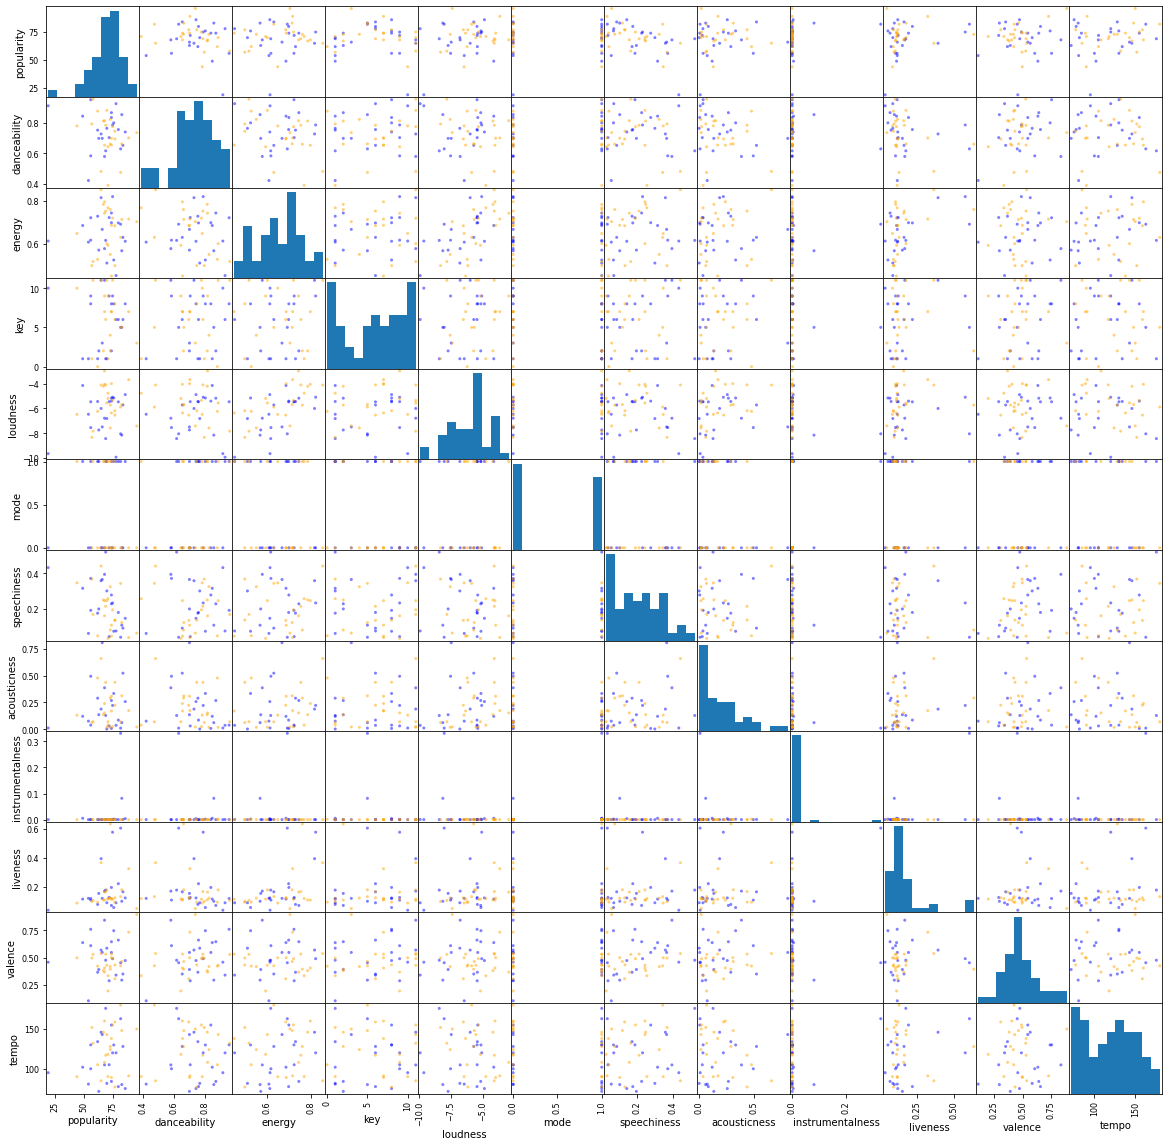

In [18]:
from pandas.plotting import scatter_matrix
import matplotlib
colors = {0:'orange', 1:'blue'}
# plot scatter matrix using pandas and matplotlib
smr = pd.plotting.scatter_matrix(pd_dataframe.iloc[:,0:12],figsize=(20,20),grid=True, c=pd_dataframe['class_assignment'].map(colors))

In [31]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = pd_dataframe.drop(columns='class_assignment')
Y = pd_dataframe['class_assignment']
sc = StandardScaler()

X_normalized = sc.fit_transform(X)
pca = PCA()
X_transformed = pca.fit_transform(X_normalized)
explained_variance = pca.explained_variance_ratio_

In [32]:
print(explained_variance)

[0.18636243 0.15548138 0.11909247 0.11277536 0.09494682 0.08359289
 0.08050059 0.05156372 0.04535309 0.03371849 0.0219196  0.01469315]


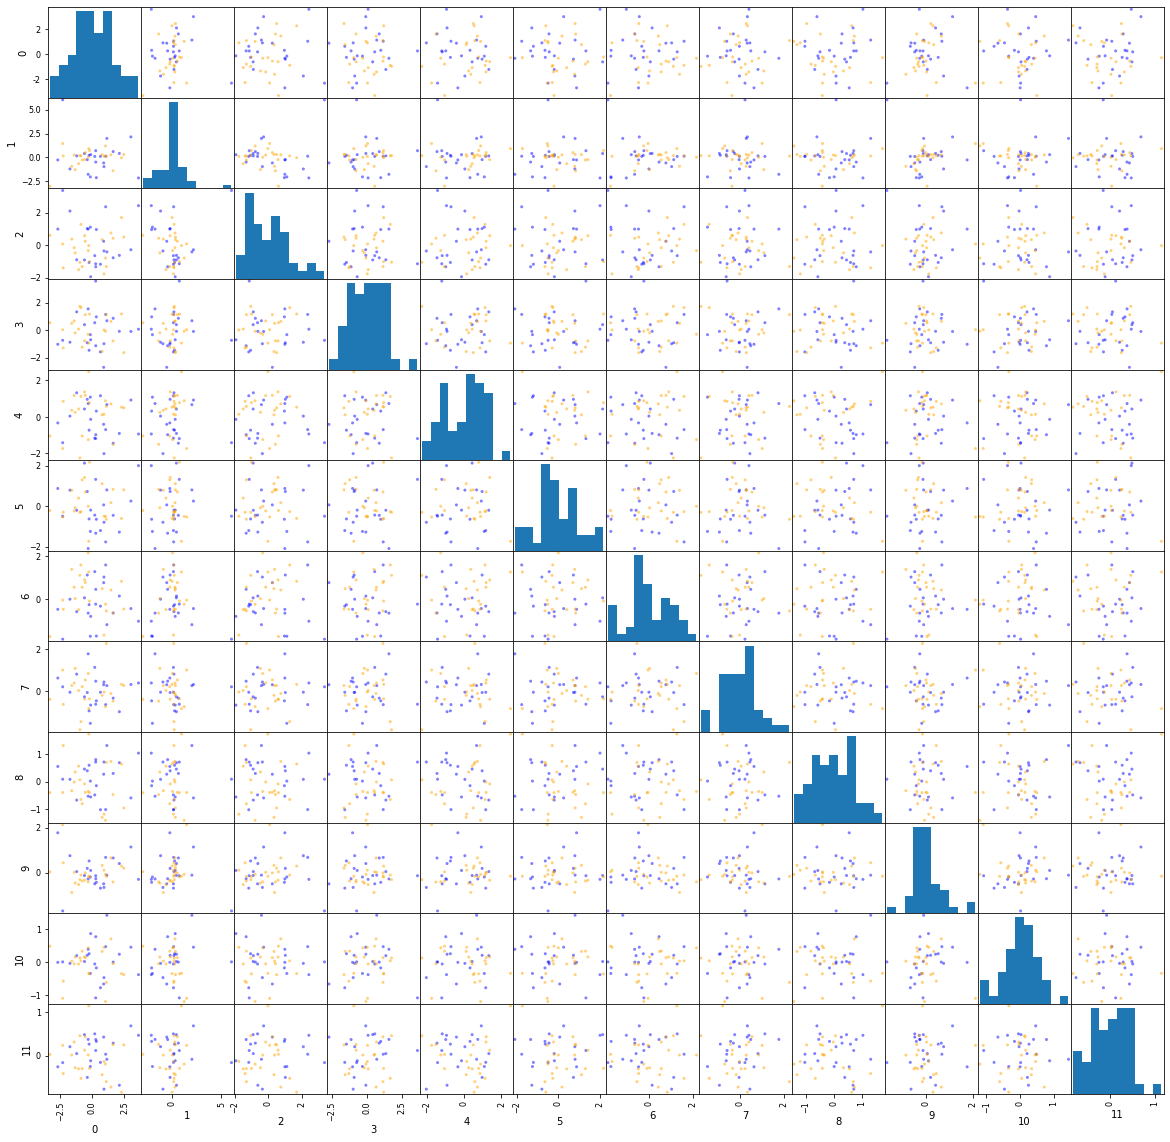

In [42]:
pd_pca_X = pd.DataFrame(data=X_transformed)
smr = pd.plotting.scatter_matrix(pd_pca_X,figsize=(20,20),grid=True, c=pd_dataframe['class_assignment'].map(colors))

In [43]:
X_transformed

array([[ 1.62580922e+00,  6.01813139e-01, -7.71781847e-01,
         8.62551227e-01, -1.44593406e+00, -4.50313222e-01,
        -6.49721993e-01, -3.27628209e-01,  3.01148774e-01,
         6.48433470e-01,  9.89336003e-03,  2.91349764e-01],
       [ 1.13531382e+00,  1.98435085e+00, -4.08548717e-01,
         6.84259771e-01,  6.73763984e-01,  8.02955764e-01,
        -1.19813761e+00,  2.64517343e-01,  1.32549005e+00,
        -1.14193886e-01,  1.42608856e+00, -8.06858625e-02],
       [ 3.17157455e-01, -2.13374911e+00,  9.68280383e-01,
         9.68564122e-01,  3.19969868e-01, -6.44428751e-01,
        -1.72986719e+00, -4.56599268e-01, -1.47818311e-01,
        -4.32946980e-01, -1.66271704e-01,  3.31232487e-01],
       [-3.18441478e-01, -1.78277000e+00,  9.95943879e-01,
         1.55071951e+00,  7.34431196e-01, -2.08930838e+00,
        -6.58283265e-01,  1.77018103e+00, -5.33946078e-01,
        -2.83528184e-01,  3.96649561e-01,  3.77571081e-01],
       [ 3.59531157e+00, -2.16345723e+00,  2.4376570